In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [3]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df["target"].unique()

array([0, 1, 2])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<AxesSubplot:>

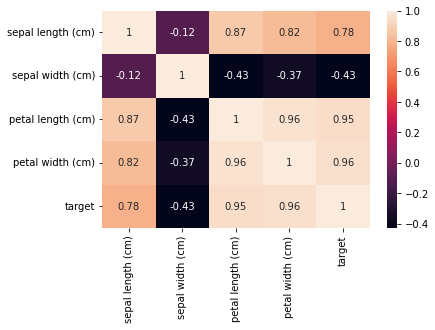

In [8]:
sns.heatmap(df.corr(), annot = True)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [10]:
df.shape

(150, 5)

In [11]:
train, test = train_test_split(df, test_size=0.3,random_state = 40)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [12]:
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # taking the training data features
train_y = train[['target']]

test_X = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # taking test data feature
test_y = test[['target']] 

In [13]:
train_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
118,7.7,2.6,6.9,2.3
138,6.0,3.0,4.8,1.8
75,6.6,3.0,4.4,1.4
37,4.9,3.6,1.4,0.1


In [14]:
train_y.head()

,target
39,0
118,2
138,2
75,1
37,0


In [15]:
test_X.head()
test_X.to_csv('testfile.csv')

In [16]:
test_y.head()

,target
38,0
66,1
115,2
117,2
89,1


In [17]:
model1 = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(test_y,prediction))

The accuracy of Logistic Regression is:  1.0


In [18]:
model2 = DecisionTreeClassifier()
model2.fit(train_X, train_y)
prediction = model2.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  1.0


## We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [19]:
petal = df[['petal length (cm)','petal width (cm)','target']]
sepal = df[['sepal length (cm)','sepal width (cm)','target']]

In [20]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['petal width (cm)','petal length (cm)']]
train_y_p = train_p[['target']]

test_x_p = test_p[['petal width (cm)','petal length (cm)']]
test_y_p = test_p[['target']]

In [21]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['sepal width (cm)','sepal length (cm)']]
train_y_s = train_s[['target']]

test_x_s = test_s[['sepal width (cm)','sepal length (cm)']]
test_y_s = test_s[['target']]

In [22]:
model3 = LogisticRegression()
model3.fit(train_x_p,train_y_p) 
prediction=model3.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model3.fit(train_x_s,train_y_s) 
prediction=model3.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [23]:
model4=DecisionTreeClassifier()
model4.fit(train_x_p,train_y_p) 
prediction=model4.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model4.fit(train_x_s,train_y_s) 
prediction=model4.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [26]:
import tensorflow_data_validation as tfdv


train, test = train_test_split(df, test_size=0.3,random_state = 40)
train_stats = tfdv.generate_statistics_from_dataframe(train)
test_stats = tfdv.generate_statistics_from_dataframe(test)

tfdv.visualize_statistics(
    lhs_statistics=test_stats, 
    rhs_statistics=train_stats, 
    lhs_name='TEST_DATASET', 
    rhs_name='TRAIN_DATASET'
)

In [27]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [28]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(df)

In [29]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('There is a drift (reject H0)')
else:
    print('There is no drift (fail to reject H0)')

probability=0.950, critical=653.903, stat=197.725
There is no drift (fail to reject H0)


In [30]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('There is a drift (reject H0)')
else:
    print('There is no drift (fail to reject H0)')

significance=0.050, p=1.000
There is no drift (fail to reject H0)


In [31]:
import pickle
pickle_out = open("application/classifier.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()

In [32]:
#pip install session-info
import session_info
session_info.show()